In [1]:
import numpy
import scipy.special
import matplotlib.pyplot
%matplotlib inline

In [2]:
class neuralNetwork:
    #initializing the neural network
    def __init__(self, inputnodes, hiddennodes, 
                 outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        self.lr = learningrate
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))
        self.activation_function = lambda x:scipy.special.expit(x)
        self.inverse_activation_function = lambda x: scipy.special.logit(x)
        pass
    
    #training the neural network
    def train(self, inputs_list, targets_list):
        #conver X, y to 2d arrays
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        self.who += self.lr * numpy.dot((output_errors * final_outputs * 
                                        (1.0 - final_outputs)),
                                        numpy.transpose(hidden_outputs))
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs *
                                         (1.0 - hidden_outputs)), 
                                         numpy.transpose(inputs))
        pass
    
    #querying the neural network
    def query(self, inputs_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        return final_outputs   
    
    def backquery(self, targets_list):
        final_outputs = numpy.array(targets_list, ndmin=2).T
        final_inputs = self.inverse_activation_function(final_outputs)
        hidden_outputs = numpy.dot(self.who.T, final_inputs)
        hidden_outputs -= numpy.min(hidden_outputs)
        hidden_outputs /= numpy.max(hidden_outputs)
        hidden_outputs *= 0.98
        hidden_outputs += 0.01
        hidden_inputs = self.inverse_activation_function(hidden_outputs)
        inputs = numpy.dot(self.wih.T, hidden_inputs)
        inputs -= numpy.min(inputs)
        inputs /= numpy.max(inputs)
        inputs *= 0.98
        inputs += 0.01     
        return inputs

In [3]:
input_nodes = 784
hidden_nodes = 200
output_nodes = 10
learning_rate = 0.1
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)
training_data_file = open("mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data_file .readlines()
training_data_file.close()

In [4]:
epochs = 5
for e in range(epochs):
    for record in training_data_list:
        all_values = record.split(',')
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        targets = numpy.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

In [5]:
test_data_file = open("mnist_dataset/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [6]:
scorecard = []
for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(all_values[0])
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    outputs = n.query(inputs)
    label = numpy.argmax(outputs)
    if (label == correct_label):
        scorecard
        scorecard.append(1)
    else:
        scorecard
        scorecard.append(0)
        pass
    pass

In [7]:
scorecard_array = numpy.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.9732


[0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


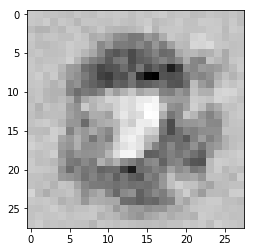

In [8]:
label = 0
targets = numpy.zeros(output_nodes) + 0.01
targets[label] = 0.99
print(targets)

image_data = n.backquery(targets)

matplotlib.pyplot.imshow(image_data.reshape(28,28), cmap='Greys', interpolation='None')